In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

In [2]:
HISTORY_DIR = Path('../results/tuning/')
filenames = ('4W_imu_2024-05-05-21-31-00', '6W_imu_2024-05-05-22-14-35', '4W_6W_imu_2024-05-06-08-53-56', '4W_imu_servo_2024-05-06-01-05-21', '6W_imu_servo_2024-05-05-23-02-53', '4W_6W_imu_servo_2024-05-06-10-26-07')
labels = ('IMU', 'IMU + POWER')

In [3]:
results = {}
for filename in filenames:
    with open(HISTORY_DIR / (filename + '.json')) as fp:
        results[filename] = json.load(fp)

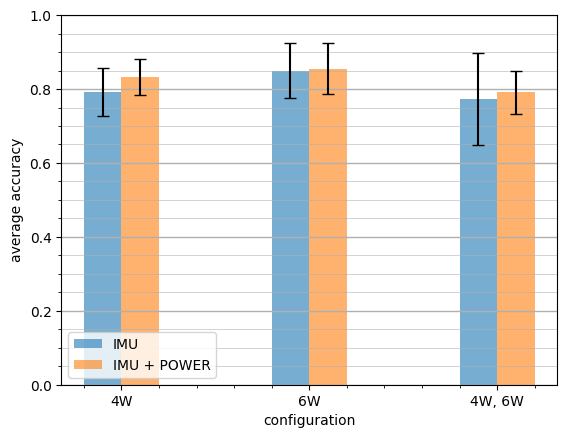

In [4]:
fig, ax = plt.subplots()

average_acc, std_dev_acc = [], []
for result in results.values():
    df = pd.DataFrame(result)
    res_array = np.array(df.loc['accuracy'].values.tolist()).T
    average_acc.append(res_array.mean())
    std_dev_acc.append(res_array.std())
    
average_acc_imu = average_acc[:3]
std_dev_acc_imu = std_dev_acc[:3]
average_acc_all = average_acc[3:]
std_dev_acc_all = std_dev_acc[3:]

ind = np.arange(len(average_acc_imu)) # the x locations for the groups
width = 0.2 # the width of the bars
ax.bar(ind, average_acc_imu, width, yerr=std_dev_acc_imu, label='IMU', capsize=4, alpha=0.6)

ax.bar(ind + width, average_acc_all, width, yerr=std_dev_acc_all, label='IMU + POWER', capsize=4, alpha=0.6)

ax.set_xticks(ind + width / 2, labels=['4W', '6W', '4W, 6W'])
ax.set_ylim(0, 1)
ax.set_xlabel('configuration')
ax.set_ylabel('average accuracy')
plt.grid(which='major', axis='y', linewidth=1)
plt.grid(which='minor', axis='y', linewidth=0.4)
plt.minorticks_on()
plt.legend()

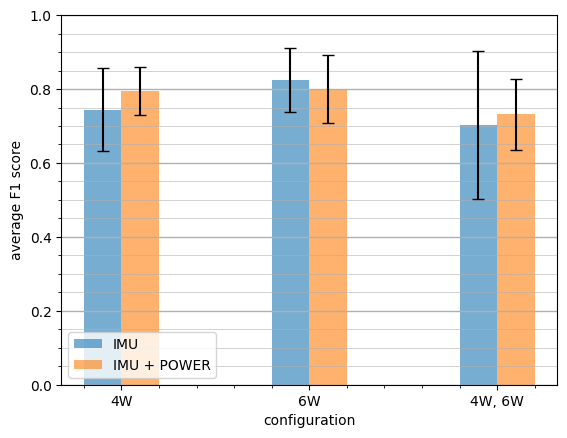

In [5]:
fig, ax = plt.subplots()

average_acc, std_dev_acc = [], []
for result in results.values():
    df = pd.DataFrame(result)
    res_array = np.array(df.loc['f1_score'].values.tolist()).T
    average_acc.append(res_array.mean())
    std_dev_acc.append(res_array.std())
    
average_acc_imu = average_acc[:3]
std_dev_acc_imu = std_dev_acc[:3]
average_acc_all = average_acc[3:]
std_dev_acc_all = std_dev_acc[3:]

ind = np.arange(len(average_acc_imu)) # the x locations for the groups
width = 0.2 # the width of the bars
ax.bar(ind, average_acc_imu, width, yerr=std_dev_acc_imu, label='IMU', capsize=4, alpha=0.6)

ax.bar(ind + width, average_acc_all, width, yerr=std_dev_acc_all, label='IMU + POWER', capsize=4, alpha=0.6)

ax.set_xticks(ind + width / 2, labels=['4W', '6W', '4W, 6W'])
ax.set_ylim(0, 1)
ax.set_xlabel('configuration')
ax.set_ylabel('average F1 score')
plt.grid(which='major', axis='y', linewidth=1)
plt.grid(which='minor', axis='y', linewidth=0.4)
plt.minorticks_on()
plt.legend()